In [1]:
import numpy as np
import pandas as pd
from graphviz import Graph
import seaborn as sns

In [21]:
raw_data= pd.read_csv('alarm10K.csv')

In [22]:
column_names=raw_data.columns

In [23]:
mi=np.zeros((37,37))
mi_jvhw=np.zeros((37,37))

In [24]:
def micalculator(df):
    column_names=df.columns
    n=len(column_names)
    for i in range(0,n):
        for j in range(i+1,n):
            #print i,j,column_names[i],column_names[j]
            joint=df.groupby([column_names[i],column_names[j]]).size().unstack(fill_value=0).stack()
            a=np.array(df.groupby([column_names[i]]).size())
            b=np.array(df.groupby([column_names[j]]).size())
            lena=len(a)
            lenb=len(b)
            a=a/10000.0
            b=b/10000.0
            prob_joint=np.array(joint).reshape((lena,lenb))
            prob_joint=prob_joint/10000.0
            #print prob_joint
            m_info_ab=0.0
            for k in range(0,lena):
                for m in range(0,lenb):
                    if(prob_joint[k][m]!=0.0):
                        m_info_ab+=prob_joint[k][m]*np.log2(prob_joint[k][m]/(a[k]*b[m]))
            #print m_info_ab
            mi[i][j]=m_info_ab
            mi[j][i]=m_info_ab
    return mi

In [25]:
mi=micalculator(raw_data)

In [26]:
def prims(V, mi):
  vertex = 0
  MST = []
  edges = []
  visited = []
  minEdge = [None,None,float('inf')]
  
  # run prims algorithm until we create an MST
  # that contains every vertex from the graph
  while len(MST) != V-1:
    
    # mark this vertex as visited
    visited.append(vertex)
    
    # add each edge to list of potential edges
    for r in range(0, V):
      if mi[vertex][r] != 0:
        edges.append([vertex,r,mi[vertex][r]])
        
    # find edge with the smallest weight to a vertex
    # that has not yet been visited
    for e in range(0, len(edges)):
      if edges[e][2] < minEdge[2] and edges[e][1] not in visited:
        minEdge = edges[e]
        
    # remove min weight edge from list of edges
    edges.remove(minEdge)

    # push min edge to MST
    MST.append(minEdge)
      
    # start at new vertex and reset min edge
    vertex = minEdge[1]
    minEdge = [None,None,float('inf')]
    
  return MST
  




In [27]:

mst= prims(37,-mi)

In [28]:
dot=Graph( filename='process.gv')
for f in range(0,len(mst)):
    dot.edge(column_names[mst[f][0]],column_names[mst[f][1]])
dot.view()

'process.gv.pdf'

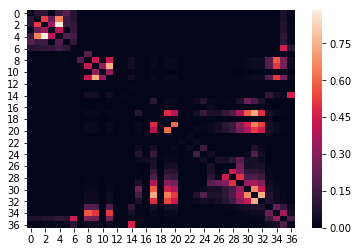

In [29]:
sns.heatmap(mi)

In [30]:
from est_MI import est_MI_JVHW

In [31]:
integerised_data=raw_data.copy()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(0,37):
    le.fit(raw_data.iloc[:,i])
    integerised_data.iloc[:,i]=le.transform(raw_data.iloc[:,i])
    
    

In [32]:
n=37
for i in range(0,n):
        for j in range(i+1,n):
            a=np.array(integerised_data.iloc[:,i])
            b=np.array(integerised_data.iloc[:,j])
            mi_jvhw[i][j]=est_MI_JVHW(a,b)
            mi_jvhw[j][i]=est_MI_JVHW(a,b)



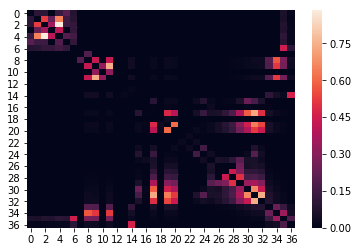

In [33]:
sns.heatmap(mi_jvhw)

In [34]:
mst_jvhw= prims(37,-mi_jvhw)

In [35]:
dot=Graph( filename='process_jvhw.gv')
for f in range(0,len(mst_jvhw)):
    dot.edge(column_names[mst_jvhw[f][0]],column_names[mst_jvhw[f][1]])
dot.view()

'process_jvhw.gv.pdf'

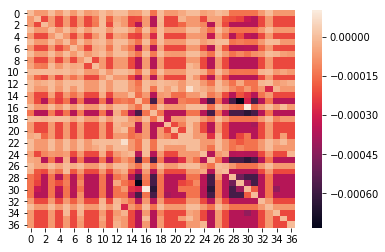

In [36]:
mi_diff=mi_jvhw-mi
sns.heatmap(mi_diff)

In [22]:
#import toyplot
# sources=[]
# targets=[]
# edges=[]
# for f in range(0,len(mst)):
#     sources.append(column_names[mst[f][0]])
#     targets.append(column_names[mst[f][1]])
#     edges.append([column_names[mst[f][0]],column_names[mst[f][1]]])
    
# edges=np.array(edges)
# print edges

# import toyplot
# toyplot.graph(sources, targets, width=3000);

# layout = toyplot.layout.Buchheim()
# toyplot.graph(edges, layout=layout, width=2000, height=2000);

[['HRBP' 'HR']
 ['HR' 'HRSAT']
 ['HRSAT' 'HREKG']
 ['HR' 'CO']
 ['CO' 'STROKEVOLUME']
 ['HREKG' 'ERRCAUTER']
 ['HR' 'CATECHOL']
 ['HRBP' 'ERRLOWOUTPUT']
 ['CO' 'BP']
 ['BP' 'TPR']
 ['STROKEVOLUME' 'LVEDVOLUME']
 ['LVEDVOLUME' 'PCWP']
 ['LVEDVOLUME' 'CVP']
 ['LVEDVOLUME' 'HYPOVOLEMIA']
 ['LVEDVOLUME' 'LVFAILURE']
 ['LVFAILURE' 'HISTORY']
 ['CATECHOL' 'ARTCO2']
 ['ARTCO2' 'VENTALV']
 ['VENTALV' 'MINVOL']
 ['VENTALV' 'VENTLUNG']
 ['VENTALV' 'PVSAT']
 ['PVSAT' 'SAO2']
 ['MINVOL' 'VENTTUBE']
 ['VENTTUBE' 'VENTMACH']
 ['VENTMACH' 'MINVOLSET']
 ['VENTTUBE' 'DISCONNECT']
 ['VENTLUNG' 'EXPCO2']
 ['VENTTUBE' 'PRESS']
 ['VENTALV' 'INTUBATION']
 ['INTUBATION' 'SHUNT']
 ['PVSAT' 'FIO2']
 ['PRESS' 'KINKEDTUBE']
 ['SHUNT' 'PULMEMBOLUS']
 ['PULMEMBOLUS' 'PAP']
 ['TPR' 'ANAPHYLAXIS']
 ['VENTLUNG' 'INSUFFANESTH']]
